<a href="https://colab.research.google.com/github/keptzin/lightcurves/blob/main/period_folding_(main).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from google.colab import drive
import math
from scipy import optimize
from scipy.optimize import minimize
!pip install PyAstronomy
from PyAstronomy.pyasl import foldAt
import pandas as pd
import csv 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.5/745.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 1.9 MB/s eta 0:00:00
  Created wheel for PyAstronomy: filename=PyAstronomy-0.19.0-py3-none-any.whl size=518903 sha256=ca5b6ee9bd0fcf834f4094861e66af4e6b7c6a329d3d4c8398af1b7f73fa6c44
  Stored in directory: /root/.cache/pip/wheels/66/a2/ae/e6933df3d90fed623a4c2d866139a16c0721faa20146a09deb
Successfully built PyAstronomy


In [ ]:
M13 = np.loadtxt('/content/V54 - IP (V54).tsv')
#M13_V8 = np.loadtxt('/content/V8 - OSS data 2 (1).tsv')
#M13_V54 = np.loadtxt('/content/V54 - OSS data (2).tsv')
#M13_V9 = np.loadtxt('/content/V9 - OSS data.tsv')
#M13_V34 = np.loadtxt('/content/V34 - OSS data.tsv')
#M13_V31 = np.loadtxt('/content/V31 - OSS data (1).tsv')
#M13_V25 = np.loadtxt('/content/V25 - OSS data.tsv')
#M13V8_OSS = np.loadtxt('/content/drive/MyDrive/OSSPipelinesekV - OSSPipelinesekV (1).tsv')

In [ ]:

MJD = M13[:,0]
calibrated_mag = M13[:,1]

def find_length(period): #method 1
  T0 = 0
  A = MJD
  B = calibrated_mag
#  phases = MJD*period % 1
  phases = foldAt(MJD, period, T0)
  length = np.sum(np.hypot(np.diff(np.sort(phases)), np.diff(B[np.argsort(phases)])))
  return(length)


def string(start, end, step):
    data = []
    num = np.linspace(start, end,(end-start)
                      *int(1/step)+1).tolist()
    string = [round(i, 5) for i in num]
    for x in string:
      A = find_length(x)
      data.append([x, A])
      print (x,",",A)
      with open("String_Lengths: V36", 'w', newline='') as file:
        csvwriter = csv.writer(file)
        csvwriter.writerows(data)
      #return x, A
      #Y = []
      #Y.append(A, ",")
      #print (Y)

L = 0.7503
SL1 = L - 0.1
SL2 = L + 0.1
print(string(0,1,0.0001))

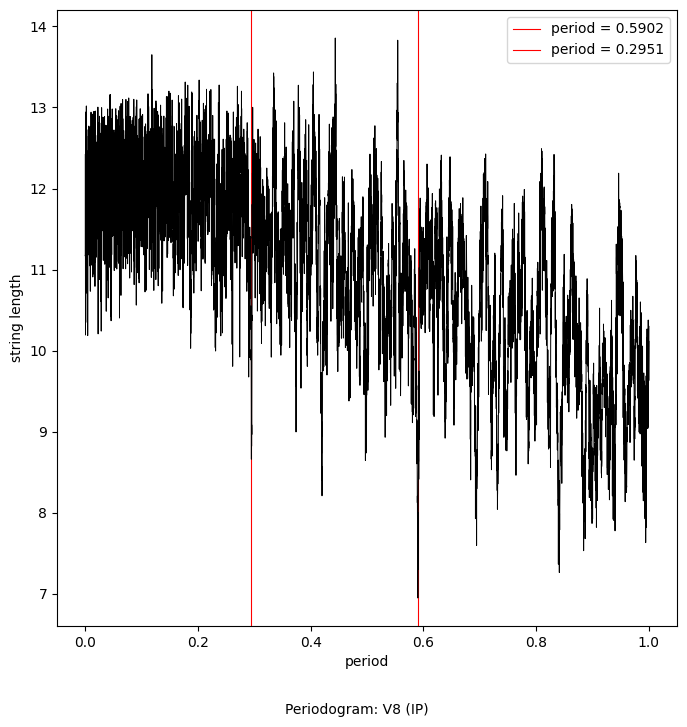

In [ ]:
data1 = np.loadtxt("/content/V54 _ - periodogram (1).tsv")

period_guess = data1[:,0]
string_length = data1[:,1]

fig, ax = plt.subplots(1,1, figsize = [8,8])
plt.axvline(0.5902, color= "red", linewidth= 0.8, label= "period = 0.5902")
plt.axvline(0.2951, color= "red", linewidth= 0.8, label= "period = 0.2951")
plt.plot(period_guess, string_length, color = "black", linewidth= 0.7)
txt = "Periodogram: V8 (IP)"
plt.xlabel("period")
plt.ylabel("string length")
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()

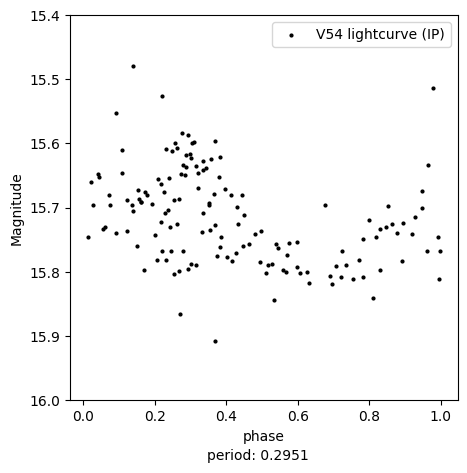

In [ ]:

MJD = M13[:,0]
calibrated_mag = M13[:,1]
period = 0.2951
T0 = 0
phases = foldAt(MJD, period, T0)
#phases = MJD/period


#two different ways that I calculated string length-- not exactly sure which one is the correct one but it seems like it's Method 1
#the 2nd method is the one I individually did, however the number seemed a little large so I referenced a yt video + github that's method 1




#model = np.poly1d(np.polyfit(phases,calibrated_mag,4))

fig, ax = plt.subplots(1,1, figsize = [5,5])
plt.scatter(phases, calibrated_mag,color = "black", s = 4,label = "V54 lightcurve (IP)")

#plt.plot(polyline,model(polyline))
#plt.errorbar(MJD, calibrated_mag, color = "black", yerr=error_mag, fmt=".k")
#plt.plot(phases, calibrated_mag, color="purple")
plt.ylim(15.4,16) #for V54 only
plt.gca().invert_yaxis()
plt.xlabel("phase")
plt.ylabel("Magnitude")
txt = "period: " + str(period)
plt.figtext(0.5, -0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
plt.show()